In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

import warnings

warnings.filterwarnings('ignore')

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
CLASSES, gems = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('../input/deeplearningtimhoki/Himpunan data'):
    f = os.path.basename(root)    # get class name - Amethyst, Onyx, etc

    if len(files) > 0:
        gems.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name

    # uncomment this block if you want a text output about each subfolder
    #count_dirs = 0
    #for f in dirs:           # count subfolders
        #count_dirs += 1
    #depth = root.split(os.sep)
    #print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, gems[-1] if gems!=[] else 0))

gems_count = len(CLASSES) # 87 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(gems)))

3 classes with 300 images in total


In [ ]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=62
CHANNELS=3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/deeplearningtimhoki/Himpunan data",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 300 files belonging to 3 classes.


2022-06-19 13:57:02.017296: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
label = dataset.class_names
label

['Botol', 'Gelas', 'Toples']

In [ ]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              # read the image (OpenCV)
                image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))       # resize the image (images are different sizes)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [ ]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [ ]:
img_w, img_h = 220, 220

In [ ]:
train_dir = "../input/deeplearningtimhoki/Himpunan data"
train_image,train_label = read_imgs_lbls(train_dir)
train_label = get_class_index(train_label)

In [ ]:
test_dir = "../input/deeplearningtimhoki/Himpunan data"
test_image,testLbl = read_imgs_lbls(test_dir)
test_label = get_class_index(testLbl)

2022-06-19 13:58:47.837103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


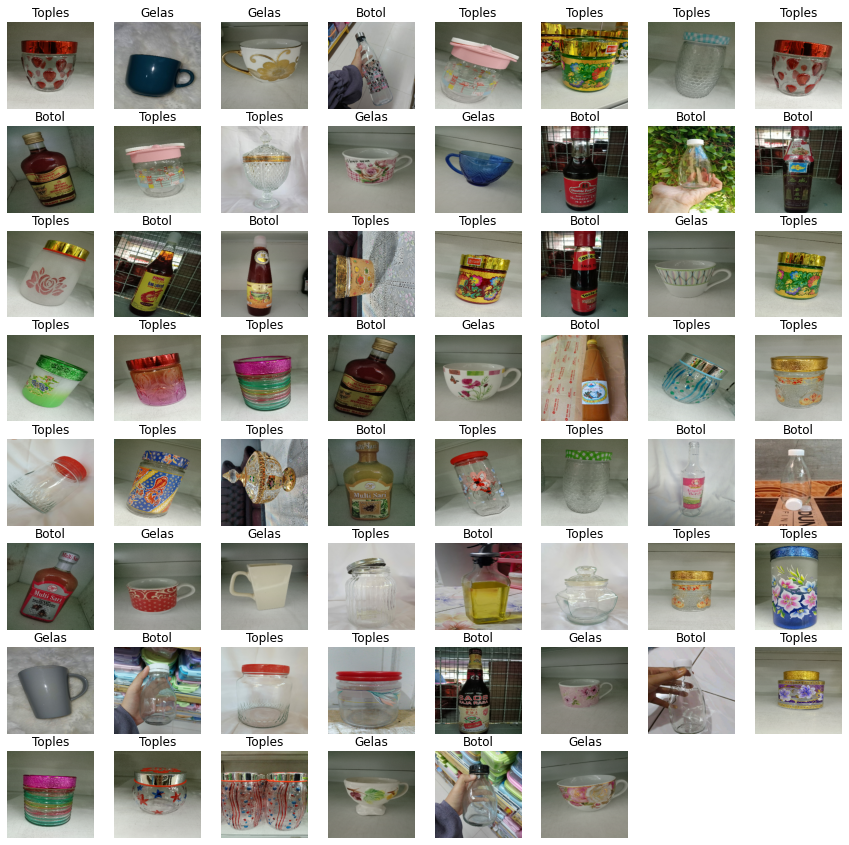

In [ ]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(label[labels_batch[i]])
        plt.axis("off")

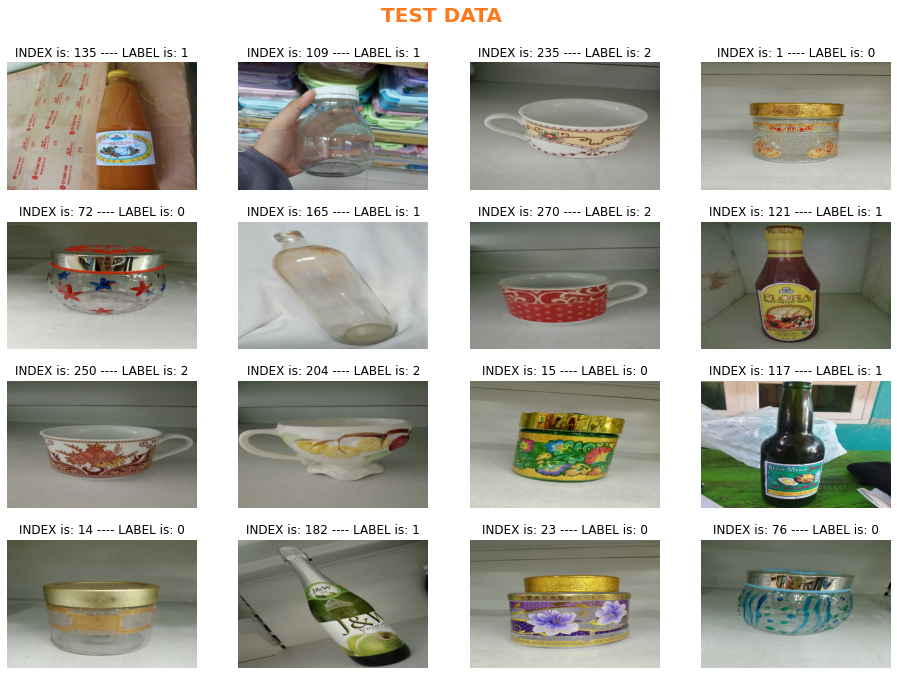

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(13,9))
fig.tight_layout()
plt.suptitle("TEST DATA\n\n\n\n", size = 20, va = 'center', color = '#ff781c', fontweight='bold')

for i in range(4):
    for j in range(4):

        # Select random number b/w 0 and length of test_image
        rand_num = np.random.randint(0, len(test_image) + 1)
        img = test_image[rand_num]      # image at specific index
        label = test_label[rand_num]    # label number of image

        axes[i][j].imshow(img, aspect='auto')
        axes[i][j].set_title(f"INDEX is: {rand_num} ---- LABEL is: {label}")
        axes[i][j].axis('off')

In [ ]:
train_label = train_label.reshape(train_label.shape[0])
test_label = test_label.reshape(test_label.shape[0])

In [ ]:
classes = ["Botol","Gelas","Toples"]

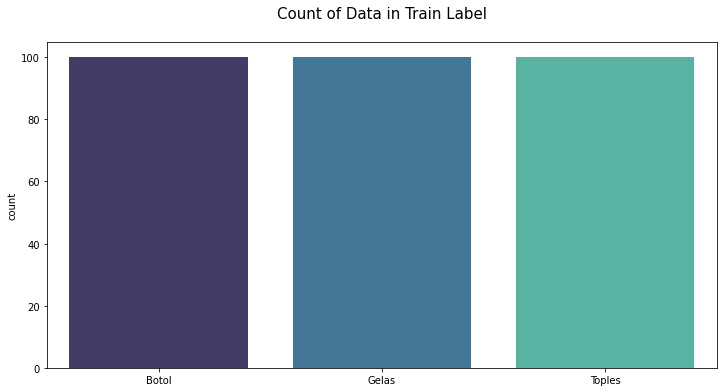

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Count of Data in Train Label\n", size = 15)

sns.countplot(x = train_label, palette='mako').set(xticklabels = classes);

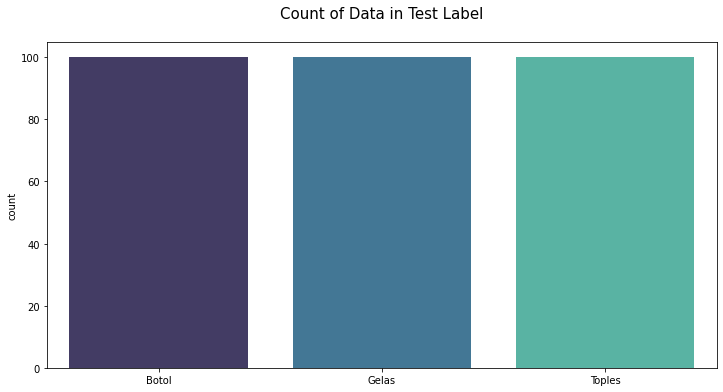

In [ ]:
plt.figure(figsize = (12,6))
plt.title("Count of Data in Test Label\n", size = 15)

sns.countplot(x = test_label, palette='mako').set(xticklabels = classes);

In [ ]:
print(f"Maximum value in train_images is: {train_image.max()}")
print(f"Minimum value in train_images is: {train_image.min()}\n")

print(f"Maximum value in test_images is: {test_image.max()}")
print(f"Minimum value in test_images is: {test_image.min()}")

Maximum value in train_images is: 255
Minimum value in train_images is: 0

Maximum value in test_images is: 255
Minimum value in test_images is: 0


In [ ]:
train_image = train_image.astype('float64') / 255.0
test_image = test_image.astype('float64') / 255.0

In [ ]:
print(f"Maximum value in train_images is: {train_image.max()}")
print(f"Minimum value in train_images is: {train_image.min()}\n")

print(f"Maximum value in test_images is: {test_image.max()}")
print(f"Minimum value in test_images is: {test_image.min()}")

Maximum value in train_images is: 1.0
Minimum value in train_images is: 0.0

Maximum value in test_images is: 1.0
Minimum value in test_images is: 0.0


In [ ]:
print(train_label)
print(test_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

In [ ]:
train_label = to_categorical(train_label, num_classes = 3)
test_label = to_categorical(test_label, num_classes = 3)

In [ ]:
print(train_label)
print(test_label)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [ ]:
input_shape = train_image.shape[1:]
num_classes = 10

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = 2,activation = "relu", input_shape = input_shape))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 32, kernel_size = 2, activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 2, activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation = "relu"))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 329, 329, 128)     1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 164, 164, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 163, 163, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 81, 81, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 81, 81, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 64)        0

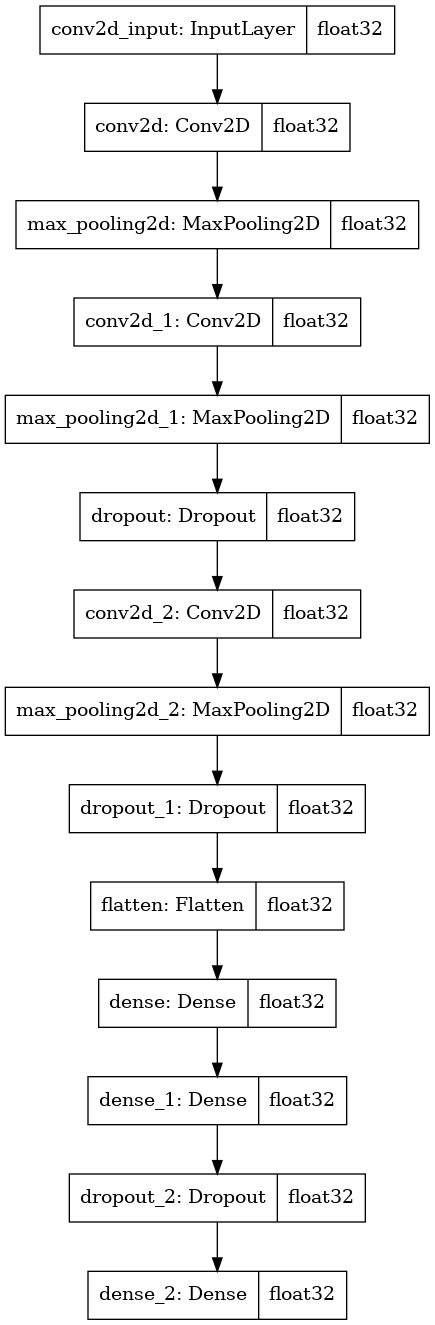

In [ ]:
plot_model(model, show_dtype = True, show_layer_names = True)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
LR = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
result = model.fit(train_image, train_label,
                   validation_split = 0.2,
                   epochs = 20,
                   batch_size = 32,
                   callbacks = [cekmodel])

Epoch 1/20
8/8 [==============================] - 31s 4s/step - loss: 4.9981 - accuracy: 0.4500 - val_loss: 1.2388 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to model.hdf5
Epoch 2/20
8/8 [==============================] - 31s 4s/step - loss: 0.9844 - accuracy: 0.5625 - val_loss: 1.1409 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/20
8/8 [==============================] - 28s 3s/step - loss: 0.8502 - accuracy: 0.5917 - val_loss: 1.3324 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/20
8/8 [==============================] - 27s 3s/step - loss: 0.7117 - accuracy: 0.6917 - val_loss: 1.0434 - val_accuracy: 0.7500

Epoch 00004: val_accuracy improved from 0.00000 to 0.75000, saving model to model.hdf5
Epoch 5/20
8/8 [==============================] - 27s 3s/step - loss: 0.6012 - accuracy: 0.7458 - val_loss: 1.2011 - val_accuracy: 0.1667

Epoch 00005:

In [ ]:
train_loss = result.history['loss']
train_acc = result.history['accuracy']
val_loss = result.history['val_loss']
val_acc = result.history['val_accuracy']

In [ ]:
pd.DataFrame({"Training Loss" : train_loss,
             "Validation Loss": val_loss,
             "Train Accuracy" : train_acc,
             "Validation Accuracy" : val_acc}).style.bar(color='#ff781c')

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy
0,4.998092,1.238785,0.450000,0.000000
1,0.984417,1.140875,0.562500,0.000000
2,0.850157,1.332396,0.591667,0.000000
3,0.711702,1.043374,0.691667,0.750000
4,0.601234,1.201077,0.745833,0.166667
5,0.559488,1.077888,0.741667,0.116667
6,0.554134,0.954023,0.770833,0.766667
7,0.438793,1.011295,0.825000,0.750000
8,0.305282,0.593520,0.879167,0.916667
9,0.221493,0.665765,0.929167,0.900000


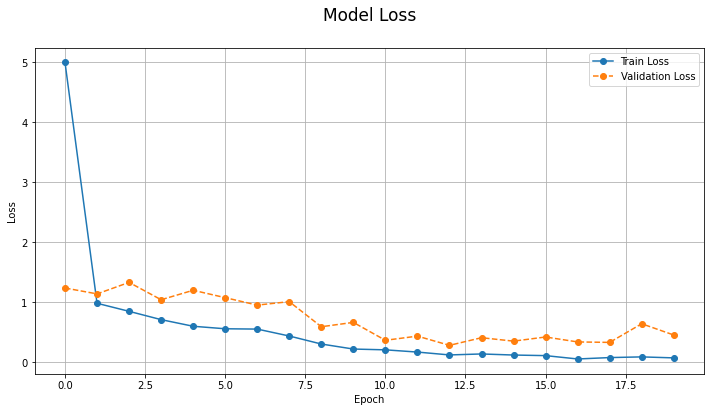

In [ ]:
plt.figure(figsize = (12,6))

plt.title("Model Loss\n", size = 17)
plt.plot(train_loss, label = "Train Loss", marker = 'o')
plt.plot(val_loss, label='Validation Loss', linestyle='--', marker='o')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend();

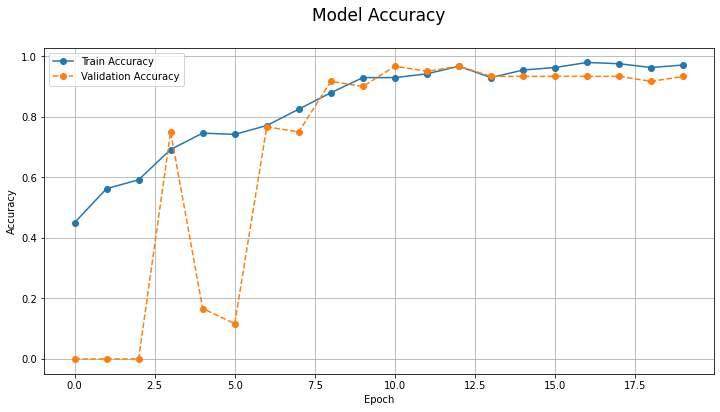

In [ ]:
plt.figure(figsize = (12,6))

plt.title("Model Accuracy\n", size = 17)
plt.plot(train_acc, label = "Train Accuracy", marker = 'o')
plt.plot(val_acc, label='Validation Accuracy', linestyle='--', marker='o')
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend();

In [ ]:
test_loss , test_acc = model.evaluate(test_image , test_label)

10/10 [==============================] - 7s 623ms/step - loss: 0.2977 - accuracy: 0.9100


In [ ]:
print(f'Loss on test data is: {test_loss}')
print(f"Accuracy on test data is: {test_acc}")

Loss on test data is: 0.29774099588394165
Accuracy on test data is: 0.9100000262260437


In [ ]:
img_15 = np.expand_dims(test_image[15], axis = 0)

pred_1 = model.predict(img_15)
pred_1

array([[9.9999595e-01, 3.8985613e-06, 1.6172177e-07]], dtype=float32)

In [ ]:
pred_1.max()

0.99999595

In [ ]:
pred_1.argmax()

0

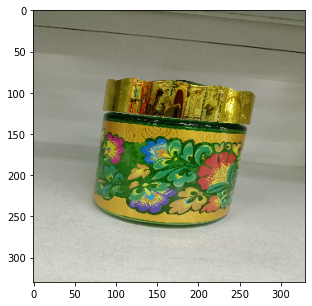

In [ ]:
plt.figure(figsize = (10,5))

plt.imshow(test_image[15]);

In [ ]:
all_prediction = model.predict(test_image)

In [ ]:
predicted_labels = [np.argmax(pred) for pred in all_prediction]

In [ ]:
test_label = [np.argmax(i) for i in test_label]

In [ ]:
predicted_labels[:20]            # displaying first 20 predicted labels

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0]

In [ ]:
test_label[:20]               # displaying first 20 actual labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# creating confusion matrix

cm = confusion_matrix(labels = test_label, predictions = predicted_labels)

In [ ]:
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[79,  7, 14],
       [ 0, 99,  1],
       [ 1,  4, 95]], dtype=int32)>

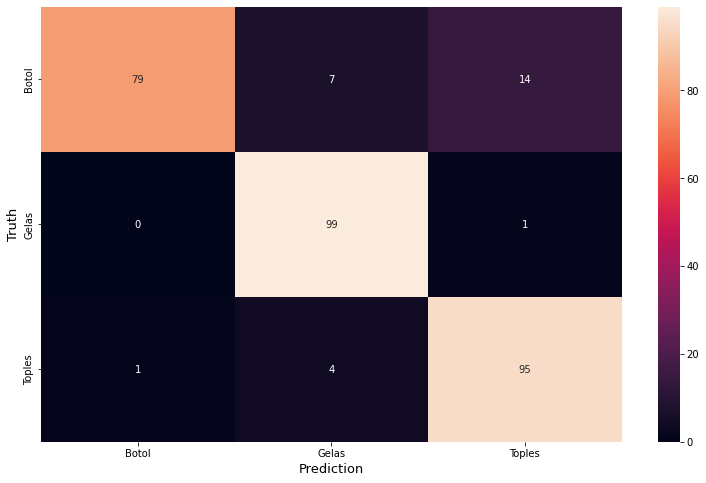

In [ ]:
#  Visualizing using seaborn

plt.figure(figsize = (13,8))
sns.heatmap(cm, annot = True, fmt = 'd').set(xticklabels = classes, yticklabels = classes)
plt.xlabel("Prediction", size = 13)
plt.ylabel("Truth",  size = 13)
plt.show()

In [ ]:
print(classification_report(test_label, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       100
           1       0.90      0.99      0.94       100
           2       0.86      0.95      0.90       100

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

